### **Bussiness Understanding**
Perusahaan saat ini sedang dilanda masalah besar, banyak karyawan yang mengajukan pengunduran diri namun perusahaan belum mengambil keputusan untuk hal itu. Bantulah perusahaan untuk menjelaskan kondisi karyawannya saat ini, serta menelusuri permasalahan yang ada dalam perusahaan yang menyebabkan karyawan itu resign sehingga dapat ***mengurangi tingkat resign dari karyawan***, dan dapat menjabarkan suatu strategi yang dapat meningkatkan retensi dari karyawan. Anda dapat menyajikan temuan deskriptif dari data menggunakan data visualisasi dan data storytelling, serta bisa mendapatkan temuan inferensial menggunakan pendekatan analisis statistik atau machine learning dengan framework seperti Interpretable & Explainable AI dalam mengkonversikan temuan model kedalam sebuah cerita.


In [74]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **EDA**

In [75]:
df = pd.read_excel('improving.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [77]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [79]:
# check duplicates data
df.duplicated().sum()

0

In [80]:
# grouping colomn into categorical and numerical
df_cat = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','NomorHP','Email','TingkatPendidikan','PernahBekerja','AlasanResign','TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign','HiringPlatform']
df_num =['EnterpriseID','SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP']

In [81]:
# check unique values

for i in df_cat:
    print(df[i].value_counts(),end='\n\n')

Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: JenjangKarir, dtype: int64

Biasa            8

In [82]:
df[df_cat].describe().T

,count,unique,top,freq
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
NomorHP,287,287,+6282232522xxx,1
Email,287,287,spiritedPorpoise3135@yahoo.com,1
TingkatPendidikan,287,3,Sarjana,176


In [83]:
df[df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

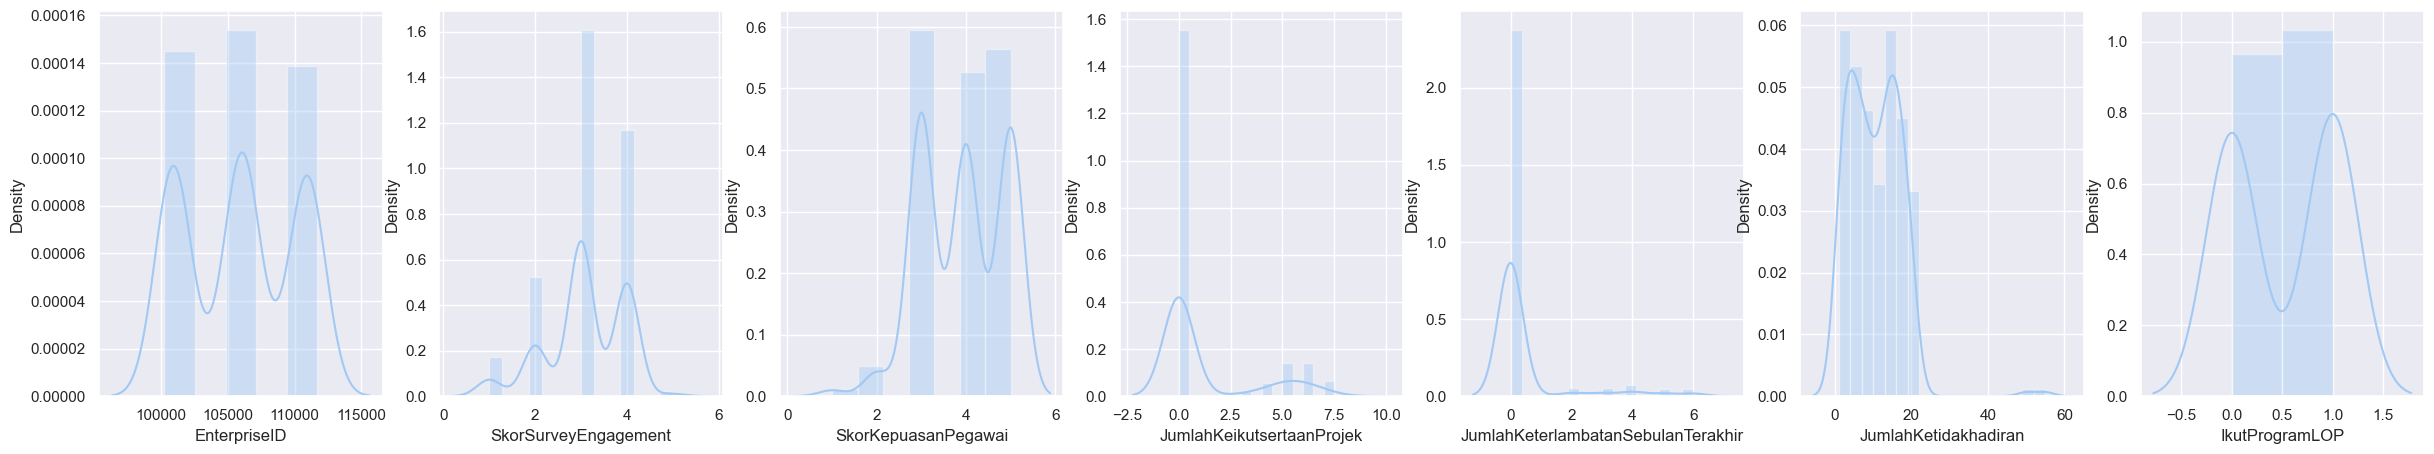

In [84]:
# create visualization for distribution of numerical data

fig, axes = plt.subplots(1,7,figsize=(30,5))

for i in range(len(df_num)):
    sns.distplot(df[df_num[i]],ax=axes[i])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

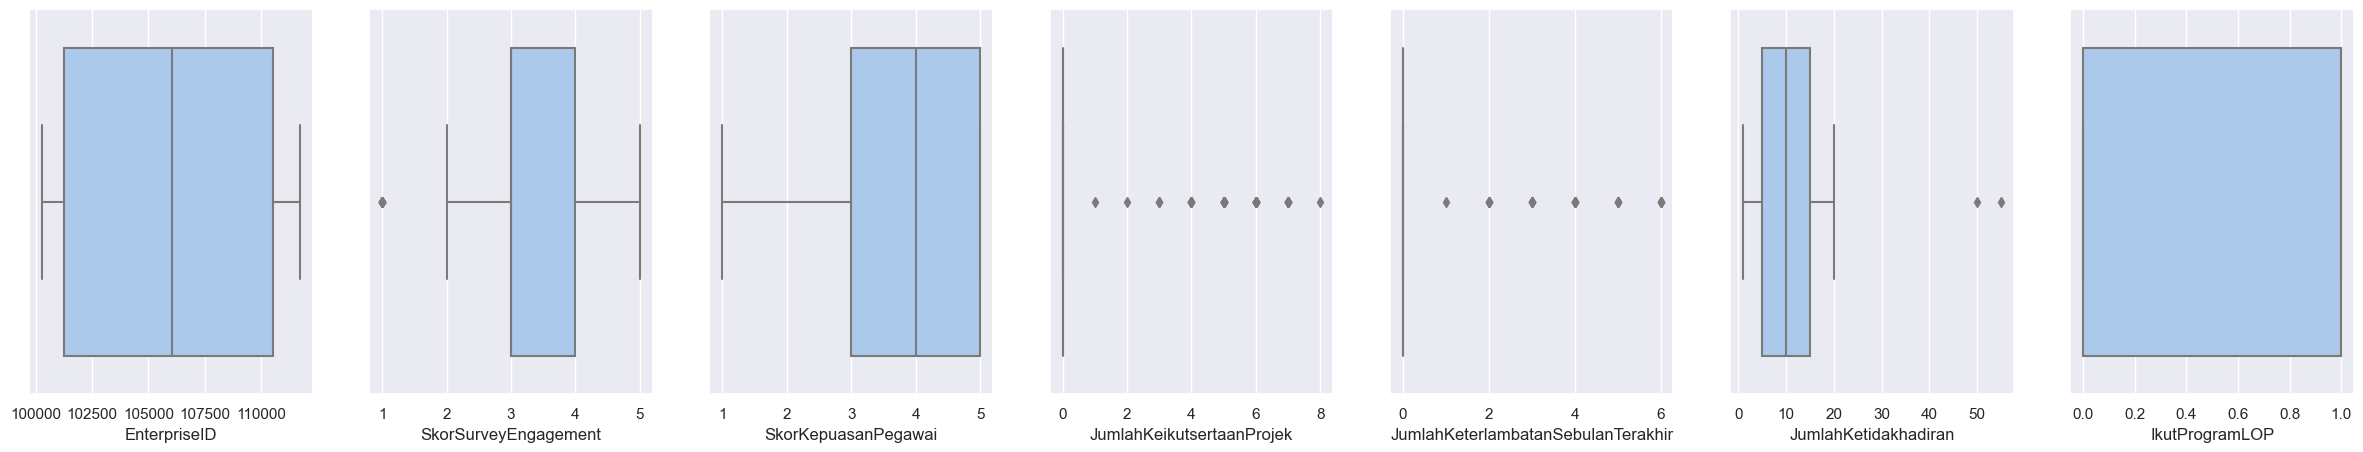

In [85]:
# check outliers visualization
fig, axes = plt.subplots(1,7,figsize=(30,5))
for i in range(len(df_num)):
    sns.boxplot(df[df_num[i]],ax=axes[i])
    

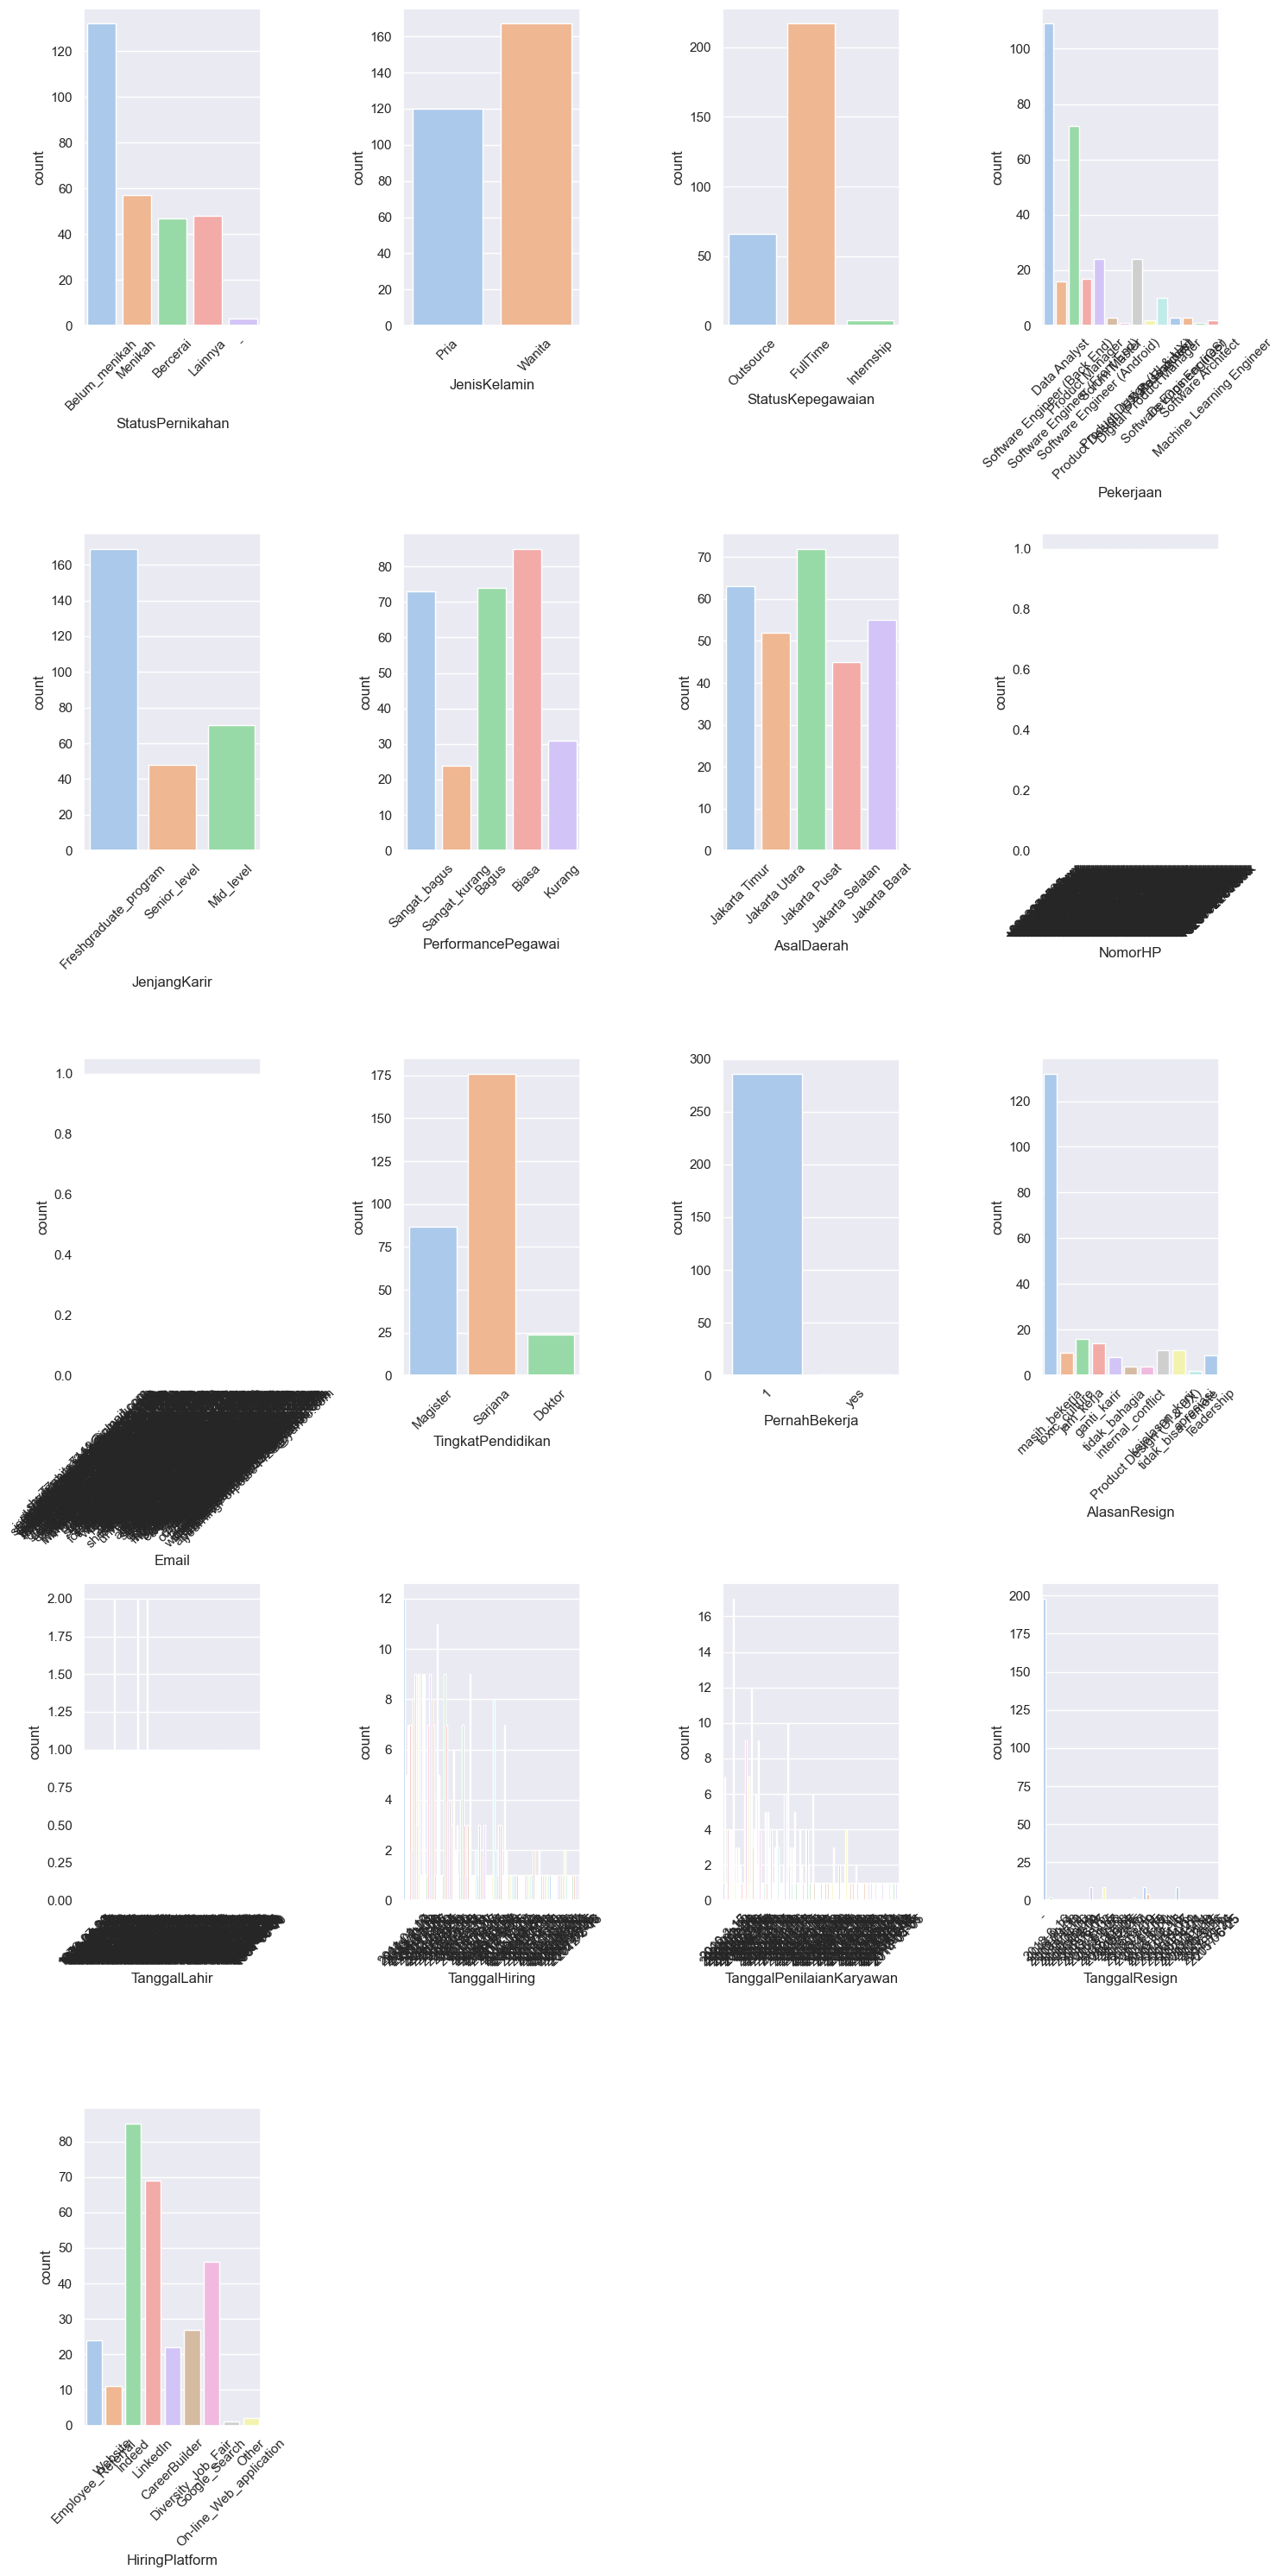

In [86]:
# let's create visualization for categorical data using countplot

fig, axes = plt.subplots(figsize=(15,30))
for i in range(len(df_cat)):
    plt.subplot(5,4,i+1)
    grap = sns.countplot(data=df,x=df_cat[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

    #set ticks labels
    grap.set_xticklabels(grap.get_xticklabels(),rotation=45)

plt.tight_layout()

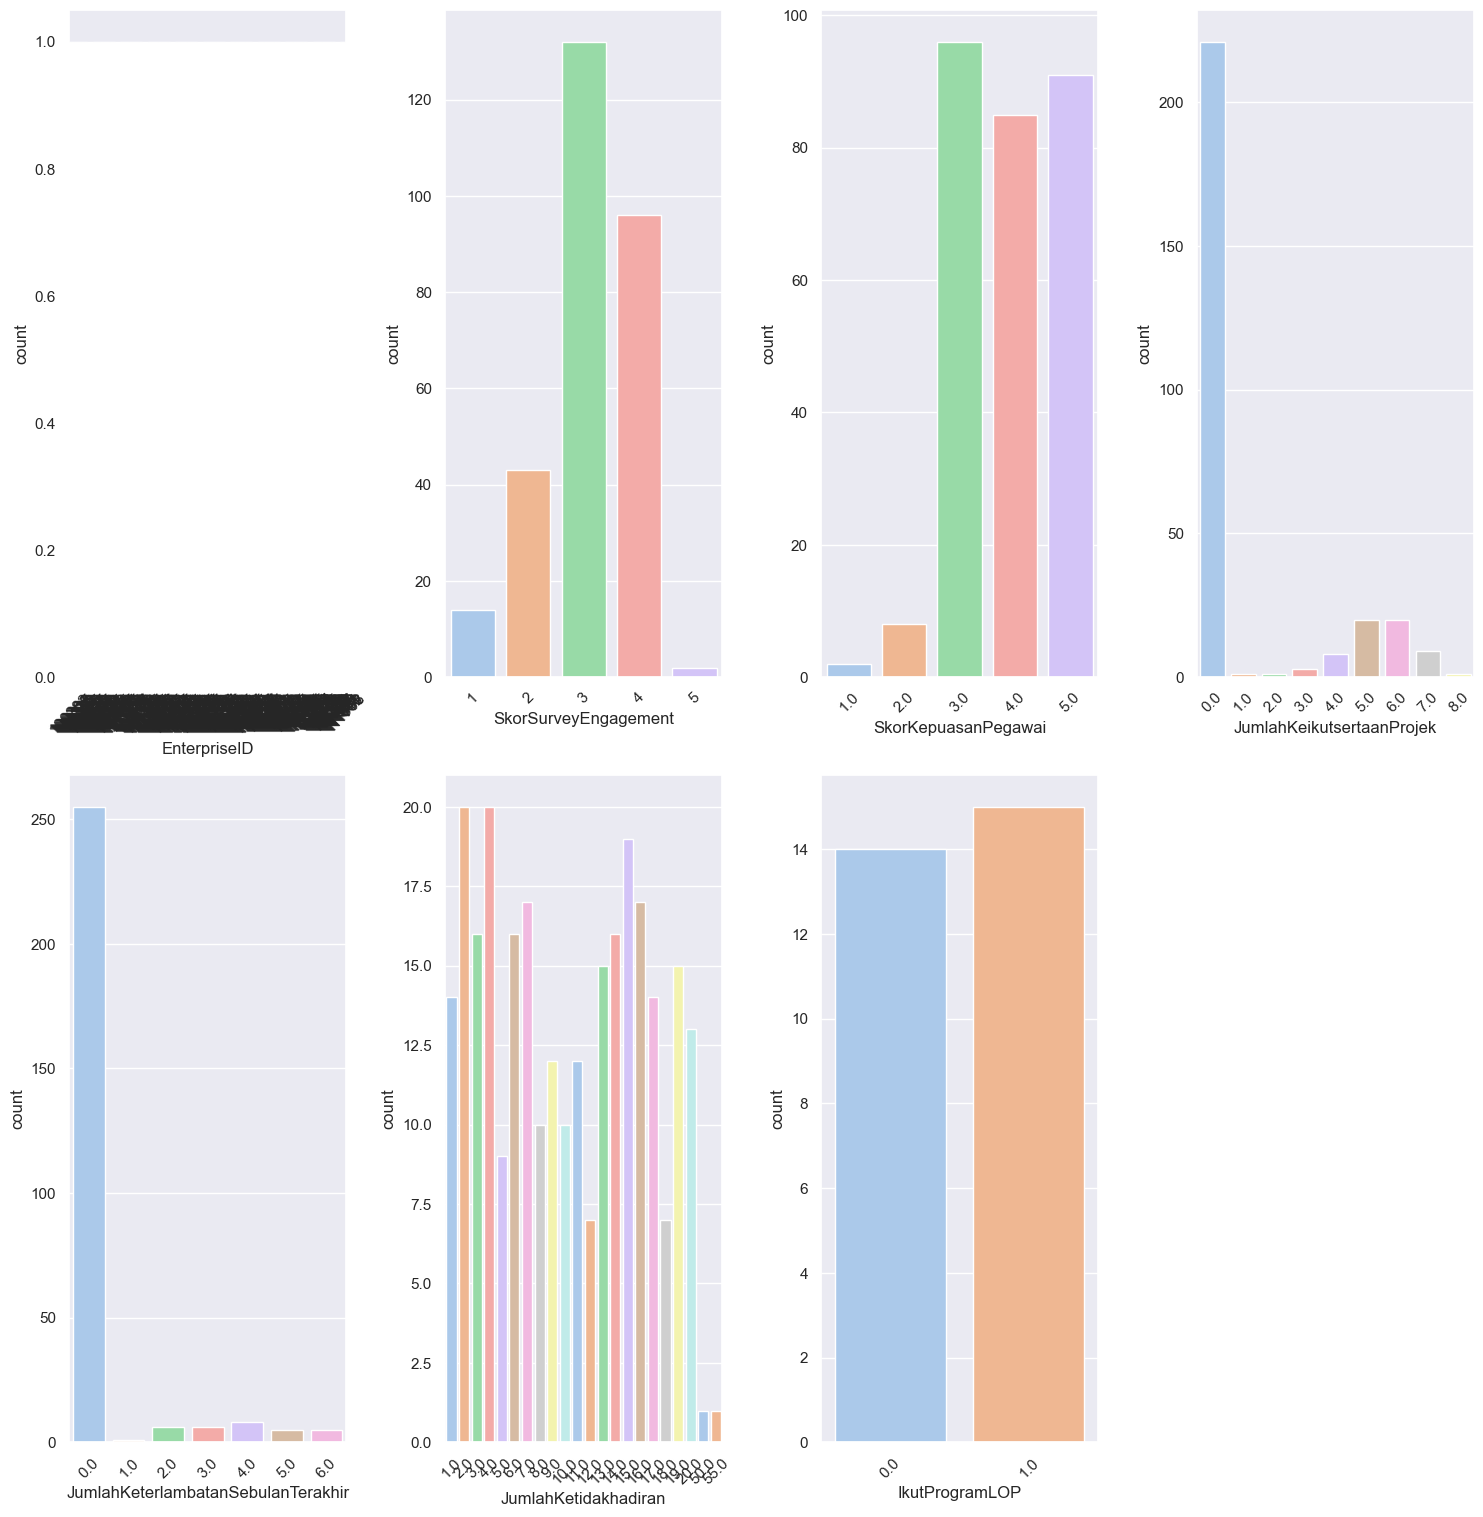

In [87]:
# let's create visualization for categorical data using countplot

fig, axes = plt.subplots(figsize=(15,30))
for i in range(len(df_num)):
    plt.subplot(4,4,i+1)
    grap = sns.countplot(data=df,x=df_num[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

    #set ticks labels
    grap.set_xticklabels(grap.get_xticklabels(),rotation=45)

plt.tight_layout()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [89]:
#drop unneeded columns
X = df.drop(['EnterpriseID','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP','TanggalResign','TanggalPenilaianKaryawan','TanggalHiring','AlasanResign','PernahBekerja','Email','NomorHP','JumlahKetidakhadiran','JumlahKeterlambatanSebulanTerakhir','JumlahKeikutsertaanProjek','HiringPlatform','AsalDaerah','Username'],axis=1)


In [90]:
# transform column TanggalLahir

X['TanggalLahir'] = pd.to_datetime(X['TanggalLahir'], format='%Y/%m/%d')

In [91]:
# create Age column
X['Age'] = 2023 - X['TanggalLahir'].dt.year
X.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,TingkatPendidikan,TanggalLahir,Age
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,Magister,1972-07-01,51
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,Sarjana,1984-04-26,39
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,Magister,1974-01-07,49
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3.0,Sarjana,1979-11-24,44
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3.0,Sarjana,1974-11-07,49
